# Preprocessing

### Make .mat from IMS

In [5]:
import os
import numpy as np
import scipy.io
from datetime import datetime
from tqdm.notebook import tqdm

def generate_combined_spectrogram(folder_path, sample_rate=20000):
    """Combines Fourier Transforms from all files into a single spectrogram."""
    file_names = sorted(os.listdir(folder_path), key=lambda x: datetime.strptime(x, "%Y.%m.%d.%H.%M.%S"))
    spectrogram = []
    timestamps = []

    for file_name in tqdm(file_names, desc="Processing files"):
        full_path = os.path.join(folder_path, file_name)
        data = np.loadtxt(full_path)
        
        # Perform Fourier Transform on each file's data
        for channel in range(data.shape[1]):
            fft_result = np.fft.fft(data[:, channel])
            spectrogram.append(np.abs(fft_result))
        
        # Store timestamp
        timestamps.append(datetime.strptime(file_name, "%Y.%m.%d.%H.%M.%S").timestamp())

    # Normalize and convert to dB scale
    spectrogram = np.array(spectrogram).T
    spectrogram_max = spectrogram.max()
    if spectrogram_max != 0:
        spectrogram = spectrogram / spectrogram_max
    spectrogram_dB = 20 * np.log10(spectrogram + 1e-6)
    
    return spectrogram_dB, timestamps

def save_to_mat_file(output_path, spectrogram, timestamps):
    """Saves the spectrogram and timestamps to a .mat file."""
    scipy.io.savemat(output_path, {'spectrogram': spectrogram, 'timestamps': timestamps})

# Example usage
# folder_path = 'your_data_folder_path'  # Replace with your data folder path
# output_mat_file = 'your_output_file_path'  # Replace with your desired .mat file path
# input_folder_path = r'C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\IMS\IMS\3\3rd_test\4th_test\txt'  # Replace with your input folder path
# input_folder_path = r'C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\IMS\IMS\2\2nd_test\2nd_test'  # Replace with your input folder path
input_folder_path = r'C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\IMS\IMS\1\1st_test\1st_test'  # Replace with your input folder path
output_folder_path = r'C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\IMS\processed\1\1'  # Replace with your output folder path

spectrogram, timestamps = generate_combined_spectrogram(input_folder_path)
save_to_mat_file(output_folder_path, spectrogram, timestamps)


Processing files:   0%|          | 0/2156 [00:00<?, ?it/s]

### Test said .mat file

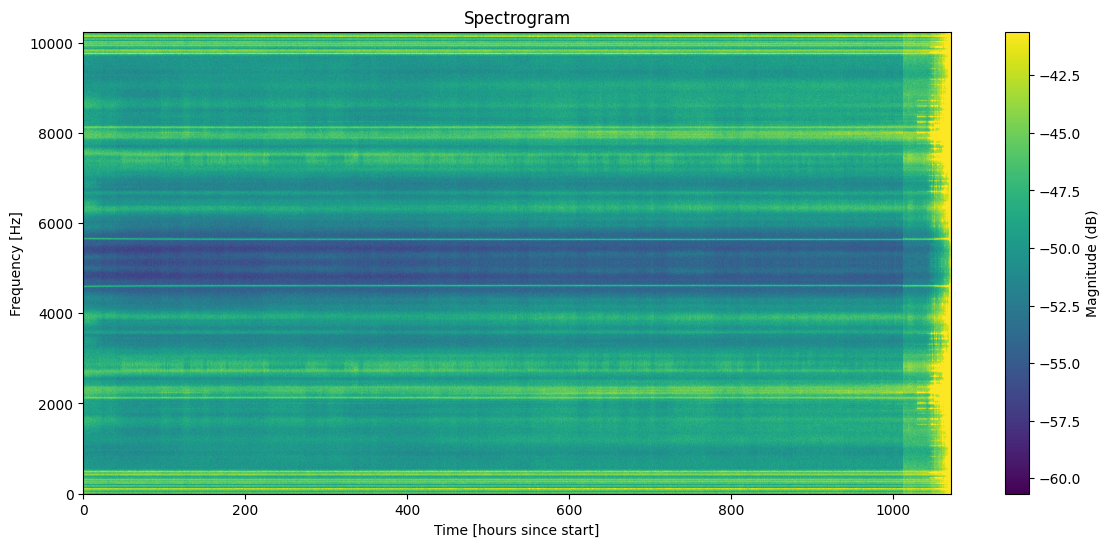

In [15]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def load_mat_and_plot_spectrogram(mat_file_path):
    # Load data from .mat file
    mat_data = scipy.io.loadmat(mat_file_path)
    spectrogram = mat_data['spectrogram']
    timestamps = mat_data['timestamps'][0]  # Assuming timestamps is a 1D array

    # Convert timestamps to a more readable format (e.g., hours since start)
    start_time = timestamps[0]
    time_hours = (timestamps - start_time) / 3600  # Convert seconds to hours

    # Plot the spectrogram with adjusted color limits and a different colormap
    plt.figure(figsize=(14, 6))
    norm = colors.Normalize(vmin=np.percentile(spectrogram, 5), vmax=np.percentile(spectrogram, 95))  # Normalize the color range
    plt.imshow(spectrogram, aspect='auto', origin='lower', 
               extent=[time_hours[0], time_hours[-1], 0, spectrogram.shape[0] / 2],
               cmap='viridis', norm=norm)  # Use 'inferno' colormap for better contrast
    plt.colorbar(label='Magnitude (dB)')
    plt.xlabel('Time [hours since start]')
    plt.ylabel('Frequency [Hz]')
    plt.title('Spectrogram')
    plt.show()


# Example usage
# mat_file_path = r'C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\IMS\processed\1\1.mat'  # Replace with the path to your .mat file
mat_file_path = r'C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\IMS\processed\sep_spec\3\channel_2.mat'
load_mat_and_plot_spectrogram(mat_file_path)


## Separating channels

In [14]:
import os
import numpy as np
import scipy.io
from datetime import datetime
from tqdm.notebook import tqdm

def generate_combined_spectrogram(folder_path, channel_index, sample_rate=20000):
    """Combines Fourier Transforms from all files for a specific channel into a single spectrogram."""
    file_names = sorted(os.listdir(folder_path), key=lambda x: datetime.strptime(x, "%Y.%m.%d.%H.%M.%S"))
    spectrogram = []
    timestamps = []

    for file_name in tqdm(file_names, desc=f"Processing files for channel {channel_index}"):
        full_path = os.path.join(folder_path, file_name)
        data = np.loadtxt(full_path)
        
        # Perform Fourier Transform on the selected channel's data
        fft_result = np.fft.fft(data[:, channel_index])
        spectrogram.append(np.abs(fft_result))
        
        # Store timestamp
        timestamps.append(datetime.strptime(file_name, "%Y.%m.%d.%H.%M.%S").timestamp())

    # Normalize and convert to dB scale
    spectrogram = np.array(spectrogram).T
    spectrogram_max = spectrogram.max()
    if spectrogram_max != 0:
        spectrogram = spectrogram / spectrogram_max
    spectrogram_dB = 20 * np.log10(spectrogram + 1e-6)
    
    return spectrogram_dB, timestamps

def save_to_mat_file(output_path, channel_index, spectrogram, timestamps):
    """Saves the spectrogram and timestamps to a .mat file."""
    mat_file_name = f"channel_{channel_index}.mat"
    full_output_path = os.path.join(output_path, mat_file_name)
    scipy.io.savemat(full_output_path, {'spectrogram': spectrogram, 'timestamps': timestamps})

# Example usage
# input_folder_path = r'C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\IMS\IMS\1\1st_test\1st_test'  # Replace with your input folder path
# input_folder_path = r'C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\IMS\IMS\2\2nd_test\2nd_test'
input_folder_path = r'C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\IMS\IMS\3\3rd_test\4th_test\txt'
output_folder_path = r'C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\IMS\processed\sep_spec\3'  # Replace with your output folder path

# channel_indices = [4, 6]
# channel_indices = [0]
channel_indices = [2]

# Ensure the output directory exists
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

for channel_index in channel_indices:
    spectrogram, timestamps = generate_combined_spectrogram(input_folder_path, channel_index)
    save_to_mat_file(output_folder_path, channel_index, spectrogram, timestamps)


Processing files for channel 2:   0%|          | 0/6324 [00:00<?, ?it/s]